In [1]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras.models import Sequential,Model
from keras.layers import Dropout,Dense,Flatten,BatchNormalization,Activation,Input
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils.vis_utils import plot_model
from keras.utils import np_utils
from matplotlib import pyplot as plt
K.set_image_dim_ordering('tf')

Using TensorFlow backend.


In [2]:
def init_dataset():
    (X_train,y_train),(X_test,y_test) = mnist.load_data()
    X_train = X_train.reshape(X_train.shape[0],28,28,1).astype('float32')
    X_test = X_test.reshape(X_test.shape[0],28,28,1).astype('float32')

    X_train = X_train/255
    X_test = X_test/255

    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)

    num_classes = y_test.shape[1]
    print("Number of classes " ,num_classes)
    X_train = X_train[:10000]
    y_train = y_train[:10000]
    return X_train,y_train,num_classes

In [3]:
X_train,y_train,num_classes = init_dataset()

Number of classes  10


In [4]:
print(X_train.shape)
print(y_train.shape)

(10000, 28, 28, 1)
(10000, 10)


In [5]:
def ann_model():
    Images = Input(shape=(28,28,1))
    flat_n = Flatten()(Images)
    dense1 = Dense(100,activation='tanh',kernel_initializer='he_uniform')(flat_n)
    dense2 = Dense(1000, activation='tanh',kernel_initializer='he_normal')(dense1)
    dense3 = Dense(100,activation='tanh')(dense2)
    dense4 = Dense(10,activation='tanh')(dense3)
    dropout = Dropout(0.3)(dense4)
    dense5 = Dense(num_classes,activation='softmax')(dropout)
    model = Model(inputs=Images,outputs=dense5)
    model.compile(loss='categorical_crossentropy',optimizer='SGD', metrics=['accuracy'])
    return model

In [6]:
ann_model = ann_model()

plot_model(ann_model, to_file='ann_model_plot.png', show_shapes=True, show_layer_names=True)

In [7]:
history = ann_model.fit(X_train,y_train,validation_split=0.4, epochs=500, batch_size=64, verbose=1)

Train on 6000 samples, validate on 4000 samples
Epoch 1/500
6000/6000 [==============================] - 1s 212us/step - loss: 1.7344 - acc: 0.4678 - val_loss: 1.3803 - val_acc: 0.7037
Epoch 2/500
6000/6000 [==============================] - 1s 185us/step - loss: 1.3415 - acc: 0.6497 - val_loss: 1.1782 - val_acc: 0.7513
Epoch 3/500
6000/6000 [==============================] - 1s 160us/step - loss: 1.1996 - acc: 0.6935 - val_loss: 1.0529 - val_acc: 0.7885
Epoch 4/500
6000/6000 [==============================] - 1s 174us/step - loss: 1.0888 - acc: 0.7372 - val_loss: 0.9568 - val_acc: 0.8083
Epoch 5/500
6000/6000 [==============================] - 1s 149us/step - loss: 1.0046 - acc: 0.7565 - val_loss: 0.8799 - val_acc: 0.8310
Epoch 6/500
6000/6000 [==============================] - 1s 150us/step - loss: 0.9367 - acc: 0.7732 - val_loss: 0.8198 - val_acc: 0.8397
Epoch 7/500
6000/6000 [==============================] - 1s 158us/step - loss: 0.8934 - acc: 0.7828 - val_loss: 0.7695 - val_acc: 

6000/6000 [==============================] - 1s 149us/step - loss: 0.2354 - acc: 0.9495 - val_loss: 0.2701 - val_acc: 0.9228
Epoch 61/500
6000/6000 [==============================] - 1s 148us/step - loss: 0.2258 - acc: 0.9498 - val_loss: 0.2683 - val_acc: 0.9257
Epoch 62/500
6000/6000 [==============================] - 1s 146us/step - loss: 0.2198 - acc: 0.9532 - val_loss: 0.2669 - val_acc: 0.9260
Epoch 63/500
6000/6000 [==============================] - 1s 147us/step - loss: 0.2272 - acc: 0.9487 - val_loss: 0.2687 - val_acc: 0.9243
Epoch 64/500
6000/6000 [==============================] - 1s 147us/step - loss: 0.2163 - acc: 0.9545 - val_loss: 0.2689 - val_acc: 0.9237
Epoch 65/500
6000/6000 [==============================] - 1s 147us/step - loss: 0.2128 - acc: 0.9570 - val_loss: 0.2654 - val_acc: 0.9265
Epoch 66/500
6000/6000 [==============================] - 1s 151us/step - loss: 0.2112 - acc: 0.9565 - val_loss: 0.2614 - val_acc: 0.9250
Epoch 67/500
6000/6000 [=======================

6000/6000 [==============================] - 1s 167us/step - loss: 0.1127 - acc: 0.9752 - val_loss: 0.2506 - val_acc: 0.9303
Epoch 120/500
6000/6000 [==============================] - 1s 158us/step - loss: 0.1131 - acc: 0.9725 - val_loss: 0.2534 - val_acc: 0.9297
Epoch 121/500
6000/6000 [==============================] - 1s 170us/step - loss: 0.1100 - acc: 0.9768 - val_loss: 0.2515 - val_acc: 0.9303
Epoch 122/500
6000/6000 [==============================] - 1s 155us/step - loss: 0.1077 - acc: 0.9747 - val_loss: 0.2504 - val_acc: 0.9295
Epoch 123/500
6000/6000 [==============================] - 1s 154us/step - loss: 0.1079 - acc: 0.9757 - val_loss: 0.2529 - val_acc: 0.9305
Epoch 124/500
6000/6000 [==============================] - 1s 154us/step - loss: 0.1080 - acc: 0.9758 - val_loss: 0.2548 - val_acc: 0.9313
Epoch 125/500
6000/6000 [==============================] - 1s 166us/step - loss: 0.1111 - acc: 0.9743 - val_loss: 0.2544 - val_acc: 0.9290
Epoch 126/500
6000/6000 [================

6000/6000 [==============================] - 1s 168us/step - loss: 0.0736 - acc: 0.9817 - val_loss: 0.2605 - val_acc: 0.9315
Epoch 179/500
6000/6000 [==============================] - 1s 173us/step - loss: 0.0761 - acc: 0.9817 - val_loss: 0.2645 - val_acc: 0.9297
Epoch 180/500
6000/6000 [==============================] - 1s 160us/step - loss: 0.0779 - acc: 0.9790 - val_loss: 0.2613 - val_acc: 0.9313
Epoch 181/500
6000/6000 [==============================] - 1s 161us/step - loss: 0.0749 - acc: 0.9808 - val_loss: 0.2640 - val_acc: 0.9303
Epoch 182/500
6000/6000 [==============================] - 1s 165us/step - loss: 0.0738 - acc: 0.9823 - val_loss: 0.2623 - val_acc: 0.9313
Epoch 183/500
6000/6000 [==============================] - 1s 171us/step - loss: 0.0681 - acc: 0.9837 - val_loss: 0.2650 - val_acc: 0.9308
Epoch 184/500
6000/6000 [==============================] - 1s 164us/step - loss: 0.0702 - acc: 0.9832 - val_loss: 0.2612 - val_acc: 0.9317
Epoch 185/500
6000/6000 [================

6000/6000 [==============================] - 1s 187us/step - loss: 0.0645 - acc: 0.9812 - val_loss: 0.2739 - val_acc: 0.9335
Epoch 238/500
6000/6000 [==============================] - 1s 168us/step - loss: 0.0586 - acc: 0.9837 - val_loss: 0.2724 - val_acc: 0.9335
Epoch 239/500
6000/6000 [==============================] - 1s 170us/step - loss: 0.0566 - acc: 0.9857 - val_loss: 0.2724 - val_acc: 0.9355
Epoch 240/500
6000/6000 [==============================] - 1s 191us/step - loss: 0.0568 - acc: 0.9848 - val_loss: 0.2708 - val_acc: 0.9343
Epoch 241/500
6000/6000 [==============================] - 1s 183us/step - loss: 0.0548 - acc: 0.9863 - val_loss: 0.2737 - val_acc: 0.9333
Epoch 242/500
6000/6000 [==============================] - 1s 189us/step - loss: 0.0591 - acc: 0.9823 - val_loss: 0.2736 - val_acc: 0.9335
Epoch 243/500
6000/6000 [==============================] - 1s 181us/step - loss: 0.0596 - acc: 0.9842 - val_loss: 0.2754 - val_acc: 0.9335
Epoch 244/500
6000/6000 [================

6000/6000 [==============================] - 1s 244us/step - loss: 0.0539 - acc: 0.9820 - val_loss: 0.2855 - val_acc: 0.9360
Epoch 297/500
6000/6000 [==============================] - 1s 230us/step - loss: 0.0506 - acc: 0.9828 - val_loss: 0.2880 - val_acc: 0.9355
Epoch 298/500
6000/6000 [==============================] - 1s 231us/step - loss: 0.0518 - acc: 0.9827 - val_loss: 0.2871 - val_acc: 0.9353
Epoch 299/500
6000/6000 [==============================] - 1s 219us/step - loss: 0.0487 - acc: 0.9862 - val_loss: 0.2893 - val_acc: 0.9343
Epoch 300/500
6000/6000 [==============================] - 1s 248us/step - loss: 0.0483 - acc: 0.9855 - val_loss: 0.2845 - val_acc: 0.9335
Epoch 301/500
6000/6000 [==============================] - 2s 287us/step - loss: 0.0532 - acc: 0.9830 - val_loss: 0.2875 - val_acc: 0.9340
Epoch 302/500
6000/6000 [==============================] - 1s 235us/step - loss: 0.0447 - acc: 0.9885 - val_loss: 0.2866 - val_acc: 0.9340
Epoch 303/500
6000/6000 [================

6000/6000 [==============================] - 1s 206us/step - loss: 0.0437 - acc: 0.9863 - val_loss: 0.3005 - val_acc: 0.9345
Epoch 356/500
6000/6000 [==============================] - 1s 240us/step - loss: 0.0470 - acc: 0.9857 - val_loss: 0.3001 - val_acc: 0.9355
Epoch 357/500
6000/6000 [==============================] - 2s 281us/step - loss: 0.0432 - acc: 0.9872 - val_loss: 0.2988 - val_acc: 0.9353
Epoch 358/500
6000/6000 [==============================] - 1s 167us/step - loss: 0.0432 - acc: 0.9877 - val_loss: 0.2987 - val_acc: 0.9343
Epoch 359/500
6000/6000 [==============================] - 1s 216us/step - loss: 0.0454 - acc: 0.9838 - val_loss: 0.2971 - val_acc: 0.9353
Epoch 360/500
6000/6000 [==============================] - 2s 280us/step - loss: 0.0450 - acc: 0.9862 - val_loss: 0.3009 - val_acc: 0.9347
Epoch 361/500
6000/6000 [==============================] - 2s 304us/step - loss: 0.0446 - acc: 0.9858 - val_loss: 0.2943 - val_acc: 0.9350
Epoch 362/500
6000/6000 [================

6000/6000 [==============================] - 1s 174us/step - loss: 0.0421 - acc: 0.9857 - val_loss: 0.3015 - val_acc: 0.9360
Epoch 415/500
6000/6000 [==============================] - 1s 162us/step - loss: 0.0413 - acc: 0.9857 - val_loss: 0.3042 - val_acc: 0.9360
Epoch 416/500
6000/6000 [==============================] - 1s 150us/step - loss: 0.0403 - acc: 0.9857 - val_loss: 0.3055 - val_acc: 0.9353
Epoch 417/500
6000/6000 [==============================] - 1s 145us/step - loss: 0.0425 - acc: 0.9862 - val_loss: 0.3043 - val_acc: 0.9355
Epoch 418/500
6000/6000 [==============================] - 1s 148us/step - loss: 0.0424 - acc: 0.9860 - val_loss: 0.3066 - val_acc: 0.9362
Epoch 419/500
6000/6000 [==============================] - 1s 148us/step - loss: 0.0413 - acc: 0.9852 - val_loss: 0.3043 - val_acc: 0.9365
Epoch 420/500
6000/6000 [==============================] - 1s 147us/step - loss: 0.0396 - acc: 0.9870 - val_loss: 0.3068 - val_acc: 0.9353
Epoch 421/500
6000/6000 [================

6000/6000 [==============================] - 1s 197us/step - loss: 0.0391 - acc: 0.9862 - val_loss: 0.3121 - val_acc: 0.9355
Epoch 474/500
6000/6000 [==============================] - 1s 178us/step - loss: 0.0362 - acc: 0.9862 - val_loss: 0.3116 - val_acc: 0.9362
Epoch 475/500
6000/6000 [==============================] - 1s 181us/step - loss: 0.0420 - acc: 0.9852 - val_loss: 0.3111 - val_acc: 0.9360
Epoch 476/500
6000/6000 [==============================] - 1s 182us/step - loss: 0.0396 - acc: 0.9852 - val_loss: 0.3103 - val_acc: 0.9375
Epoch 477/500
6000/6000 [==============================] - 1s 177us/step - loss: 0.0402 - acc: 0.9857 - val_loss: 0.3095 - val_acc: 0.9370
Epoch 478/500
6000/6000 [==============================] - 1s 162us/step - loss: 0.0384 - acc: 0.9857 - val_loss: 0.3121 - val_acc: 0.9365
Epoch 479/500
6000/6000 [==============================] - 1s 160us/step - loss: 0.0374 - acc: 0.9872 - val_loss: 0.3166 - val_acc: 0.9360
Epoch 480/500
6000/6000 [================

In [8]:
print("Acc: ",history.history['acc'][-1])
print("Val_acc: ",history.history['val_acc'][-1])
print("Loss: ",history.history['loss'][-1])
print("Val_loss: ",history.history['val_loss'][-1])

Acc:  0.9865
Val_acc:  0.9375
Loss:  0.037008852082
Val_loss:  0.313750683174


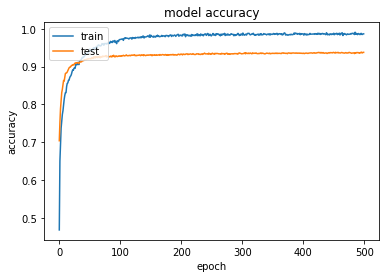

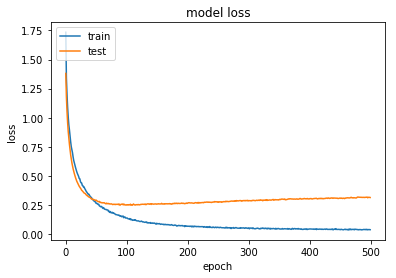

In [9]:

# summarize history for accuracy
plt.plot(history.history['acc'])

plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
#L2 regularization
from keras import regularizers
def l2_ann_model():
    Images = Input(shape=(28,28,1))
    flat_n = Flatten()(Images)
    
    dense1 = Dense(100,activation='tanh',
                   kernel_initializer='he_uniform',
                   kernel_regularizer=regularizers.l2(0.01),
                   )(flat_n)
    
    dense2 = Dense(1000, activation='tanh',
                   kernel_initializer='he_normal',
                   kernel_regularizer=regularizers.l2(0.01),
                   )(dense1)
    
    dense3 = Dense(100,activation='tanh',
                   kernel_regularizer=regularizers.l2(0.01),
                   )(dense2)
    
    dense4 = Dense(10,activation='tanh',
                   kernel_regularizer=regularizers.l2(0.01),
                   )(dense3)
    
    dropout = Dropout(0.3)(dense4)
    
    dense5 = Dense(num_classes,activation='softmax')(dropout)
    model = Model(inputs=Images,outputs=dense5)
    model.compile(loss='categorical_crossentropy',optimizer='SGD', metrics=['accuracy'])
    return model

In [11]:
X_train,y_train,num_classes = init_dataset()

Number of classes  10


In [12]:
l2_reg_model = l2_ann_model()
history = l2_reg_model.fit(X_train,y_train,validation_split=0.4, epochs=80, batch_size=32, verbose=1)

Train on 6000 samples, validate on 4000 samples
Epoch 1/80
6000/6000 [==============================] - 3s 446us/step - loss: 20.2417 - acc: 0.5747 - val_loss: 19.1944 - val_acc: 0.7690
Epoch 2/80
6000/6000 [==============================] - 2s 394us/step - loss: 18.5117 - acc: 0.7328 - val_loss: 17.7097 - val_acc: 0.8135
Epoch 3/80
6000/6000 [==============================] - 2s 392us/step - loss: 17.1250 - acc: 0.7762 - val_loss: 16.3961 - val_acc: 0.8367
Epoch 4/80
6000/6000 [==============================] - 3s 461us/step - loss: 15.8746 - acc: 0.8020 - val_loss: 15.2065 - val_acc: 0.8542
Epoch 5/80
6000/6000 [==============================] - 2s 378us/step - loss: 14.7433 - acc: 0.8158 - val_loss: 14.1229 - val_acc: 0.8545
Epoch 6/80
6000/6000 [==============================] - 2s 386us/step - loss: 13.7070 - acc: 0.8295 - val_loss: 13.1183 - val_acc: 0.8672
Epoch 7/80
6000/6000 [==============================] - 2s 392us/step - loss: 12.7502 - acc: 0.8352 - val_loss: 12.2034 - va

6000/6000 [==============================] - 2s 413us/step - loss: 0.9615 - acc: 0.9103 - val_loss: 0.9054 - val_acc: 0.9127
Epoch 61/80
6000/6000 [==============================] - 3s 437us/step - loss: 0.9375 - acc: 0.9137 - val_loss: 0.8923 - val_acc: 0.9137
Epoch 62/80
6000/6000 [==============================] - 3s 417us/step - loss: 0.9267 - acc: 0.9098 - val_loss: 0.8770 - val_acc: 0.9125
Epoch 63/80
6000/6000 [==============================] - 3s 448us/step - loss: 0.9075 - acc: 0.9073 - val_loss: 0.8681 - val_acc: 0.9133
Epoch 64/80
6000/6000 [==============================] - 3s 443us/step - loss: 0.9035 - acc: 0.9085 - val_loss: 0.8498 - val_acc: 0.9133
Epoch 65/80
6000/6000 [==============================] - 3s 440us/step - loss: 0.8869 - acc: 0.9108 - val_loss: 0.8371 - val_acc: 0.9143
Epoch 66/80
6000/6000 [==============================] - 3s 434us/step - loss: 0.8569 - acc: 0.9147 - val_loss: 0.8205 - val_acc: 0.9177
Epoch 67/80
6000/6000 [==============================

In [13]:
print("Acc: ",history.history['acc'][-1])
print("Val_acc: ",history.history['val_acc'][-1])
print("Loss: ",history.history['loss'][-1])
print("Val_loss: ",history.history['val_loss'][-1])

Acc:  0.917333333333
Val_acc:  0.91375
Loss:  0.747698083083
Val_loss:  0.72643693924


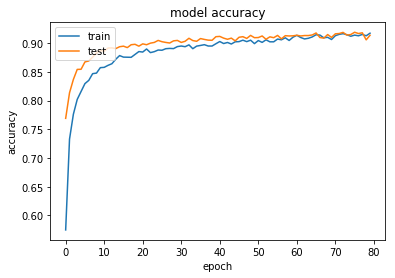

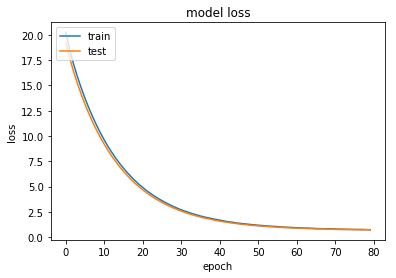

In [14]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
def l1_ann_model():
    Images = Input(shape=(28,28,1))
    flat_n = Flatten()(Images)
    
    dense1 = Dense(100,activation='tanh',
                   kernel_initializer='he_uniform',
                   kernel_regularizer=regularizers.l1(0.01),
                   )(flat_n)
    
    dense2 = Dense(1000, activation='tanh',
                   kernel_initializer='he_normal',
                   kernel_regularizer=regularizers.l1(0.01),
                   )(dense1)
    
    dense3 = Dense(100,activation='tanh',
                   kernel_regularizer=regularizers.l1(0.01),
                   )(dense2)
    
    dense4 = Dense(10,activation='tanh',
                   kernel_regularizer=regularizers.l1(0.01),
                   )(dense3)
    
    dropout = Dropout(0.3)(dense4)
    
    dense5 = Dense(num_classes,activation='softmax')(dropout)
    model = Model(inputs=Images,outputs=dense5)
    model.compile(loss='categorical_crossentropy',optimizer='SGD', metrics=['accuracy'])
    return model

In [16]:
X_train,y_train,num_classes = init_dataset()

Number of classes  10


In [17]:
l1_reg_model = l1_ann_model()
history = l1_reg_model.fit(X_train,y_train,validation_split=0.4, epochs=500, batch_size=32, verbose=1)

Train on 6000 samples, validate on 4000 samples
Epoch 1/500
6000/6000 [==============================] - 2s 297us/step - loss: 151.8822 - acc: 0.5088 - val_loss: 128.6156 - val_acc: 0.7130
Epoch 2/500
6000/6000 [==============================] - 2s 267us/step - loss: 109.3792 - acc: 0.6370 - val_loss: 91.4719 - val_acc: 0.7352
Epoch 3/500
6000/6000 [==============================] - 2s 266us/step - loss: 77.3558 - acc: 0.6383 - val_loss: 64.7526 - val_acc: 0.6800
Epoch 4/500
6000/6000 [==============================] - 2s 365us/step - loss: 55.6853 - acc: 0.5738 - val_loss: 47.8587 - val_acc: 0.5555
Epoch 5/500
6000/6000 [==============================] - 2s 328us/step - loss: 42.0700 - acc: 0.4268 - val_loss: 36.8485 - val_acc: 0.4213
Epoch 6/500
6000/6000 [==============================] - 2s 286us/step - loss: 32.4752 - acc: 0.3330 - val_loss: 28.3334 - val_acc: 0.3192
Epoch 7/500
6000/6000 [==============================] - 2s 299us/step - loss: 24.7753 - acc: 0.2978 - val_loss: 21

Epoch 60/500
6000/6000 [==============================] - 3s 502us/step - loss: 1.7622 - acc: 0.5155 - val_loss: 1.8114 - val_acc: 0.4835
Epoch 61/500
6000/6000 [==============================] - 3s 442us/step - loss: 1.7535 - acc: 0.5065 - val_loss: 1.7553 - val_acc: 0.4895
Epoch 62/500
6000/6000 [==============================] - 2s 413us/step - loss: 1.7411 - acc: 0.5103 - val_loss: 1.6759 - val_acc: 0.5540
Epoch 63/500
6000/6000 [==============================] - 2s 408us/step - loss: 1.7509 - acc: 0.5037 - val_loss: 1.7026 - val_acc: 0.5457
Epoch 64/500
6000/6000 [==============================] - 2s 392us/step - loss: 1.7470 - acc: 0.5117 - val_loss: 1.7190 - val_acc: 0.5413
Epoch 65/500
6000/6000 [==============================] - 3s 428us/step - loss: 1.7424 - acc: 0.5123 - val_loss: 1.6814 - val_acc: 0.5417
Epoch 66/500
6000/6000 [==============================] - 2s 405us/step - loss: 1.7368 - acc: 0.5120 - val_loss: 2.2660 - val_acc: 0.2885
Epoch 67/500
6000/6000 [==========

6000/6000 [==============================] - 2s 257us/step - loss: 1.6939 - acc: 0.5278 - val_loss: 1.6794 - val_acc: 0.5457
Epoch 120/500
6000/6000 [==============================] - 2s 267us/step - loss: 1.6946 - acc: 0.5445 - val_loss: 1.6537 - val_acc: 0.5545
Epoch 121/500
6000/6000 [==============================] - 2s 268us/step - loss: 1.6917 - acc: 0.5445 - val_loss: 1.8380 - val_acc: 0.4425
Epoch 122/500
6000/6000 [==============================] - 2s 256us/step - loss: 1.6989 - acc: 0.5362 - val_loss: 2.0193 - val_acc: 0.4245
Epoch 123/500
6000/6000 [==============================] - 2s 327us/step - loss: 1.6830 - acc: 0.5498 - val_loss: 1.9935 - val_acc: 0.3503
Epoch 124/500
6000/6000 [==============================] - 2s 312us/step - loss: 1.6867 - acc: 0.5403 - val_loss: 1.7878 - val_acc: 0.4718
Epoch 125/500
6000/6000 [==============================] - 2s 275us/step - loss: 1.6819 - acc: 0.5357 - val_loss: 1.6532 - val_acc: 0.5713
Epoch 126/500
6000/6000 [================

6000/6000 [==============================] - 2s 292us/step - loss: 1.6637 - acc: 0.5488 - val_loss: 1.6555 - val_acc: 0.5775
Epoch 179/500
6000/6000 [==============================] - 2s 273us/step - loss: 1.6651 - acc: 0.5452 - val_loss: 1.6780 - val_acc: 0.5487
Epoch 180/500
6000/6000 [==============================] - 2s 271us/step - loss: 1.6711 - acc: 0.5428 - val_loss: 1.5895 - val_acc: 0.6062
Epoch 181/500
6000/6000 [==============================] - 2s 288us/step - loss: 1.6765 - acc: 0.5463 - val_loss: 1.6021 - val_acc: 0.5887
Epoch 182/500
6000/6000 [==============================] - 2s 320us/step - loss: 1.6723 - acc: 0.5545 - val_loss: 1.7169 - val_acc: 0.5210
Epoch 183/500
6000/6000 [==============================] - 2s 323us/step - loss: 1.6638 - acc: 0.5487 - val_loss: 1.5924 - val_acc: 0.5693
Epoch 184/500
6000/6000 [==============================] - 2s 389us/step - loss: 1.6867 - acc: 0.5323 - val_loss: 1.6120 - val_acc: 0.5800
Epoch 185/500
6000/6000 [================

6000/6000 [==============================] - 2s 280us/step - loss: 1.6448 - acc: 0.5585 - val_loss: 1.6543 - val_acc: 0.5557
Epoch 238/500
6000/6000 [==============================] - 2s 267us/step - loss: 1.6341 - acc: 0.5575 - val_loss: 1.7145 - val_acc: 0.5238
Epoch 239/500
6000/6000 [==============================] - 2s 262us/step - loss: 1.6406 - acc: 0.5613 - val_loss: 1.6571 - val_acc: 0.5543
Epoch 240/500
6000/6000 [==============================] - 2s 256us/step - loss: 1.6521 - acc: 0.5575 - val_loss: 1.7298 - val_acc: 0.5370
Epoch 241/500
6000/6000 [==============================] - 2s 263us/step - loss: 1.6505 - acc: 0.5563 - val_loss: 1.5958 - val_acc: 0.5893
Epoch 242/500
6000/6000 [==============================] - 2s 254us/step - loss: 1.6503 - acc: 0.5602 - val_loss: 2.0498 - val_acc: 0.3305
Epoch 243/500
6000/6000 [==============================] - 2s 258us/step - loss: 1.6420 - acc: 0.5663 - val_loss: 1.5826 - val_acc: 0.6018
Epoch 244/500
6000/6000 [================

6000/6000 [==============================] - 2s 264us/step - loss: 1.6614 - acc: 0.5683 - val_loss: 1.7404 - val_acc: 0.4940
Epoch 297/500
6000/6000 [==============================] - 2s 255us/step - loss: 1.6286 - acc: 0.5830 - val_loss: 1.5604 - val_acc: 0.6370
Epoch 298/500
6000/6000 [==============================] - 2s 259us/step - loss: 1.6472 - acc: 0.5655 - val_loss: 1.6131 - val_acc: 0.5917
Epoch 299/500
6000/6000 [==============================] - 2s 292us/step - loss: 1.6407 - acc: 0.5672 - val_loss: 1.7836 - val_acc: 0.5045
Epoch 300/500
6000/6000 [==============================] - 2s 273us/step - loss: 1.6498 - acc: 0.5690 - val_loss: 1.5657 - val_acc: 0.6380
Epoch 301/500
6000/6000 [==============================] - 2s 265us/step - loss: 1.6290 - acc: 0.5760 - val_loss: 1.8902 - val_acc: 0.4095
Epoch 302/500
6000/6000 [==============================] - 2s 256us/step - loss: 1.6434 - acc: 0.5718 - val_loss: 1.6665 - val_acc: 0.5443
Epoch 303/500
6000/6000 [================

6000/6000 [==============================] - 2s 256us/step - loss: 1.6431 - acc: 0.5702 - val_loss: 1.8482 - val_acc: 0.4402
Epoch 356/500
6000/6000 [==============================] - 2s 262us/step - loss: 1.6268 - acc: 0.5825 - val_loss: 1.7435 - val_acc: 0.4848
Epoch 357/500
6000/6000 [==============================] - 2s 265us/step - loss: 1.6355 - acc: 0.5855 - val_loss: 1.6538 - val_acc: 0.5685
Epoch 358/500
6000/6000 [==============================] - 2s 317us/step - loss: 1.6412 - acc: 0.5680 - val_loss: 1.6056 - val_acc: 0.6042
Epoch 359/500
6000/6000 [==============================] - 2s 291us/step - loss: 1.6404 - acc: 0.5760 - val_loss: 1.5945 - val_acc: 0.6272
Epoch 360/500
6000/6000 [==============================] - 2s 282us/step - loss: 1.6449 - acc: 0.5760 - val_loss: 1.6492 - val_acc: 0.5610
Epoch 361/500
6000/6000 [==============================] - 2s 281us/step - loss: 1.6189 - acc: 0.5793 - val_loss: 1.5767 - val_acc: 0.6142
Epoch 362/500
6000/6000 [================

6000/6000 [==============================] - 2s 275us/step - loss: 1.6566 - acc: 0.5752 - val_loss: 1.5889 - val_acc: 0.6060
Epoch 415/500
6000/6000 [==============================] - 2s 412us/step - loss: 1.6390 - acc: 0.5707 - val_loss: 1.6720 - val_acc: 0.5555
Epoch 416/500
6000/6000 [==============================] - 2s 328us/step - loss: 1.6237 - acc: 0.5817 - val_loss: 1.6333 - val_acc: 0.6160
Epoch 417/500
6000/6000 [==============================] - 2s 293us/step - loss: 1.6296 - acc: 0.5773 - val_loss: 1.5521 - val_acc: 0.6355
Epoch 418/500
6000/6000 [==============================] - 3s 451us/step - loss: 1.6505 - acc: 0.5725 - val_loss: 1.7090 - val_acc: 0.5523
Epoch 419/500
6000/6000 [==============================] - 2s 379us/step - loss: 1.6502 - acc: 0.5663 - val_loss: 1.6088 - val_acc: 0.5940
Epoch 420/500
6000/6000 [==============================] - 2s 390us/step - loss: 1.6293 - acc: 0.5785 - val_loss: 1.5882 - val_acc: 0.6178
Epoch 421/500
6000/6000 [================

6000/6000 [==============================] - 2s 258us/step - loss: 1.6217 - acc: 0.5813 - val_loss: 1.6124 - val_acc: 0.6018
Epoch 474/500
6000/6000 [==============================] - 2s 260us/step - loss: 1.6411 - acc: 0.5772 - val_loss: 1.5954 - val_acc: 0.6220
Epoch 475/500
6000/6000 [==============================] - 2s 257us/step - loss: 1.6342 - acc: 0.5817 - val_loss: 2.0410 - val_acc: 0.4165
Epoch 476/500
6000/6000 [==============================] - 2s 259us/step - loss: 1.6258 - acc: 0.5855 - val_loss: 1.7675 - val_acc: 0.4958
Epoch 477/500
6000/6000 [==============================] - 2s 262us/step - loss: 1.6248 - acc: 0.5822 - val_loss: 1.8745 - val_acc: 0.4765
Epoch 478/500
6000/6000 [==============================] - 2s 258us/step - loss: 1.6310 - acc: 0.5678 - val_loss: 1.5538 - val_acc: 0.6305
Epoch 479/500
6000/6000 [==============================] - 2s 253us/step - loss: 1.6300 - acc: 0.5815 - val_loss: 1.5823 - val_acc: 0.6338
Epoch 480/500
6000/6000 [================

In [18]:
print("Acc: ",history.history['acc'][-1])
print("Val_acc: ",history.history['val_acc'][-1])
print("Loss: ",history.history['loss'][-1])
print("Val_loss: ",history.history['val_loss'][-1])

Acc:  0.582
Val_acc:  0.533
Loss:  1.62112187481
Val_loss:  1.73954319286


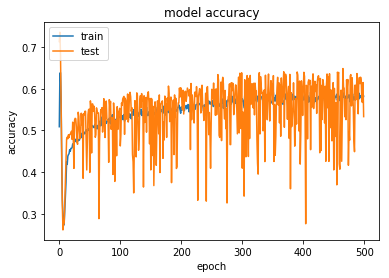

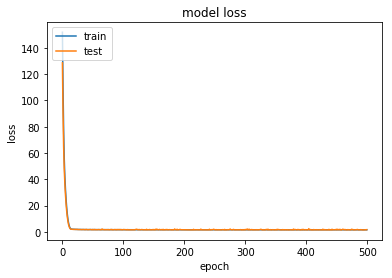

In [19]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()